In [1]:
# importing modules
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
from scipy.stats import linregress

In [2]:
# loading raw csv data
cpi_median = pd.read_csv('median_consumer_price_index.csv')

# renaming columns
cpi_median.columns = ['Date by Month', 'CPI Median']

# displaying data
cpi_median.head()

,Date by Month,CPI Median
0,2015-01-01,1.947530
1,2015-02-01,1.954495
2,2015-03-01,2.433336
3,2015-04-01,2.962651
4,2015-05-01,2.501291


# CPI_MEDIAN NOTES

Source: Federal Reserve Bank of Cleveland  Release: Current Median CPI  
Units:  Percent Change at Annual Rate, Seasonally Adjusted

Frequency:  Monthly

Median Consumer Price Index (CPI) is a measure of core inflation calculated the Federal Reserve Bank of Cleveland and the Ohio State University. Median CPI was created as a different way to get a 'Core CPI' measure, or a better measure of underlying inflation trends. To calculate the Median CPI, the Cleveland Fed analyzes the median price change of the goods and services published by the BLS. The median price change is the price change that's right in the middle of the long list of all of the price changes. This series excludes 49.5% of the CPI components with the highest and lowest one-month price changes from each tail of the price-change distribution resulting in a Median CPI Inflation Estimate.

According to research from the Cleveland Fed, the Median CPI provides a better signal of the inflation trend than either the all-items CPI or the CPI excluding food and energy. According to newer research done at the Cleveland Fed, the Median CPI is even better at PCE inflation in the near and longer term than the core PCE.

For further information, visit The Federal Reserve Bank of Cleveland.

Suggested Citation:
Federal Reserve Bank of Cleveland, Median Consumer Price Index [MEDCPIM158SFRBCLE], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/MEDCPIM158SFRBCLE, July 25, 2024.

In [3]:
# loading raw csv data
cpi_consumers = pd.read_csv("cpi_for_all_urban_consumers-all_items_in_us_city_avg.csv")

# renaming columns
cpi_consumers.columns = ['Date by Month', 'CPI Consumers']

# displaying data
cpi_consumers.head()

,Date by Month,CPI Consumers
0,2015-01-01,234.747
1,2015-02-01,235.342
2,2015-03-01,235.976
3,2015-04-01,236.222
4,2015-05-01,237.001


# CPI_Urban_Consumers NOTES

Source: U.S. Bureau of Labor Statistics  Release: Consumer Price Index  
Units:  Index 1982-1984=100, Seasonally Adjusted

Frequency:  Monthly

The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers. Percent changes in the price index measure the inflation rate between any two time periods. The most common inflation metric is the percent change from one year ago. It can also represent the buying habits of urban consumers. This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, self-employed, short-term workers, unemployed, retirees, and those not in the labor force.

The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from about 4,000 housing units and approximately 26,000 retail establishments across 87 urban areas. To calculate the index, price changes are averaged with weights representing their importance in the spending of the particular group. The index measures price changes (as a percent change) from a predetermined reference date. In addition to the original unadjusted index distributed, the Bureau of Labor Statistics also releases a seasonally adjusted index. The unadjusted series reflects all factors that may influence a change in prices. However, it can be very useful to look at the seasonally adjusted CPI, which removes the effects of seasonal changes, such as weather, school year, production cycles, and holidays.

The CPI can be used to recognize periods of inflation and deflation. Significant increases in the CPI within a short time frame might indicate a period of inflation, and significant decreases in CPI within a short time frame might indicate a period of deflation. However, because the CPI includes volatile food and oil prices, it might not be a reliable measure of inflationary and deflationary periods. For a more accurate detection, the core CPI (CPILFESL) is often used. When using the CPI, please note that it is not applicable to all consumers and should not be used to determine relative living costs. Additionally, the CPI is a statistical measure vulnerable to sampling error since it is based on a sample of prices and not the complete average.

For more information on the consumer price indexes, see:
Bureau of Economic Analysis. "CPI Detailed Report." 2013.
Handbook of Methods
Understanding the CPI: Frequently Asked Questions

Suggested Citation:
U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL, July 25, 2024.

In [4]:
# merging dataframes
cpi_data = pd.merge(cpi_median, cpi_consumers)
cpi_data.head()

,Date by Month,CPI Median,CPI Consumers
0,2015-01-01,1.947530,234.747
1,2015-02-01,1.954495,235.342
2,2015-03-01,2.433336,235.976
3,2015-04-01,2.962651,236.222
4,2015-05-01,2.501291,237.001


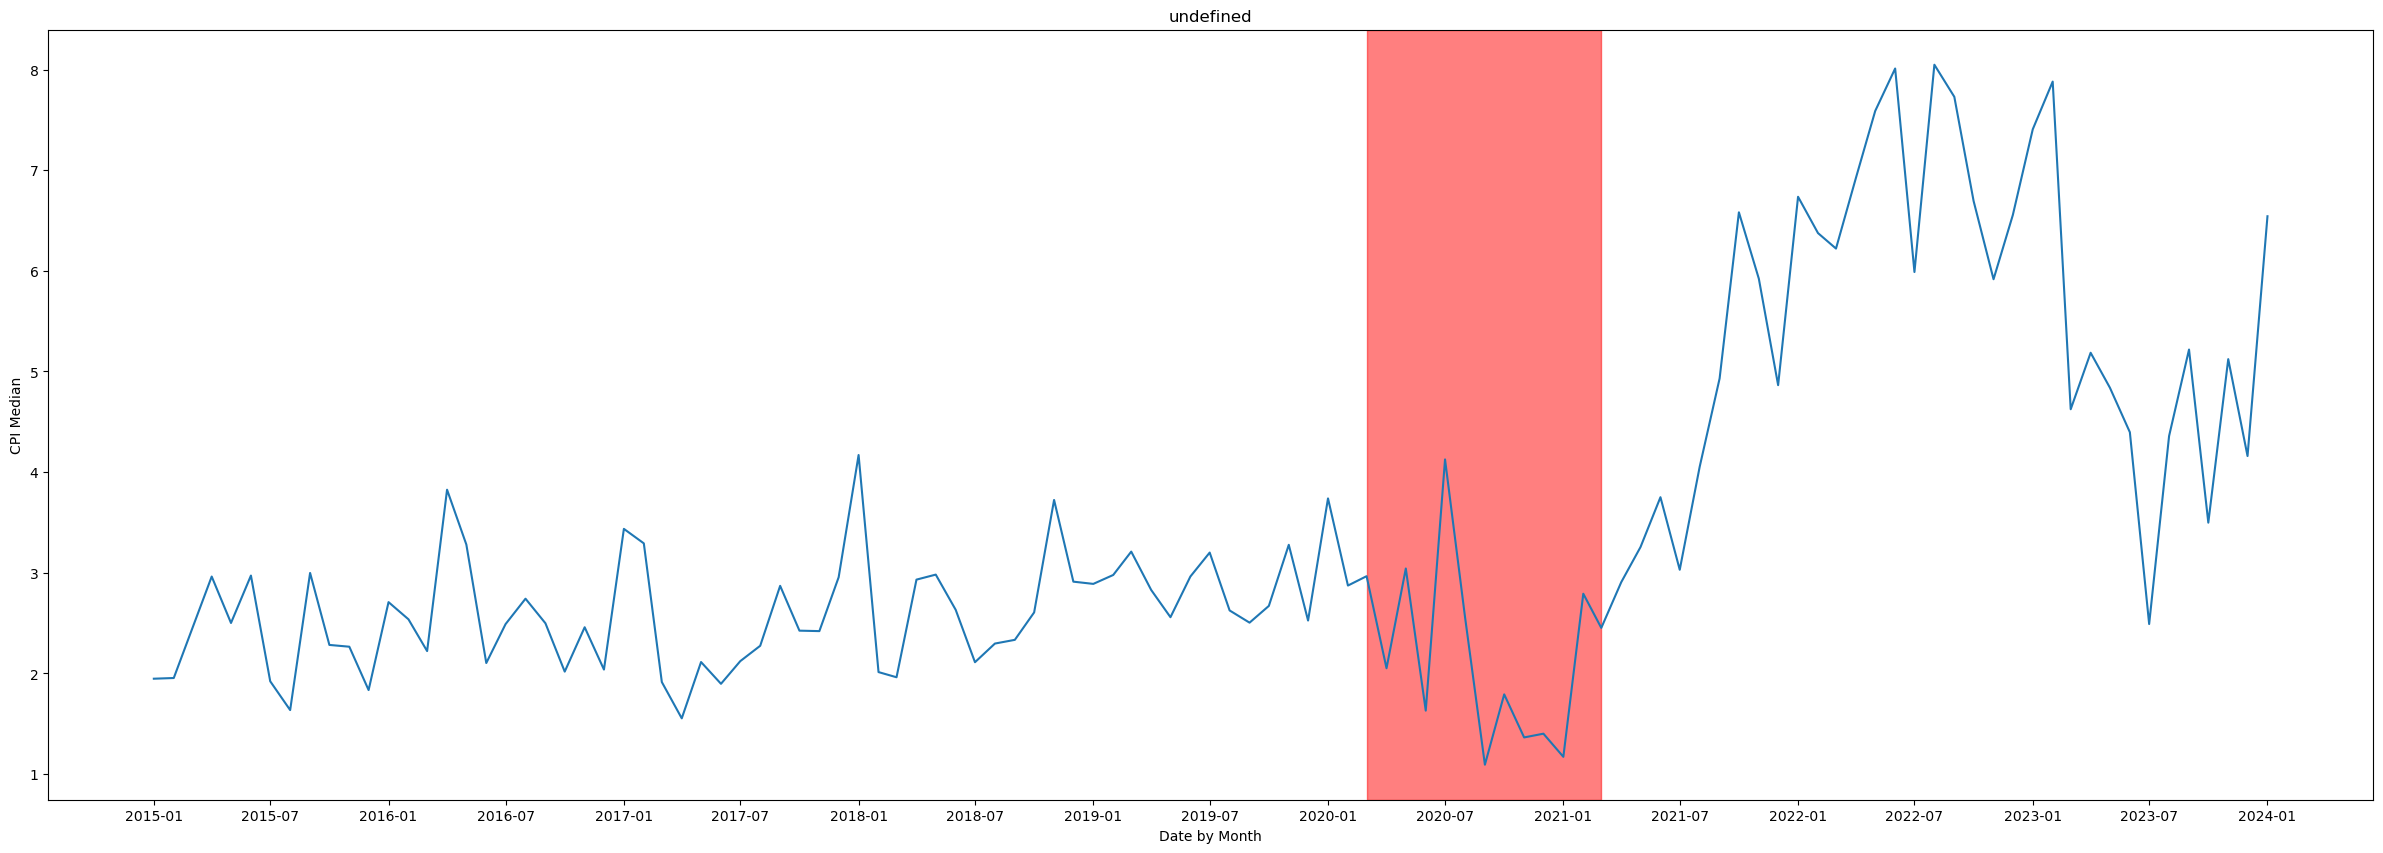

In [5]:
# converting months to datetime
cpi_data['Date by Month'] = pd.to_datetime(cpi_data['Date by Month'])

# plotting
fig,ax=plt.subplots(figsize=(30, 10))
ax.plot(cpi_data['Date by Month'], cpi_data['CPI Median'])
plt.xlabel('Date by Month')
ax.set_xticks(cpi_data['Date by Month'])
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.axvspan(*mdates.datestr2num(['2020/03/01', '2021/03/01']), color='red', alpha=0.5)
plt.ylabel('CPI Median')
plt.title('undefined')
plt.show()

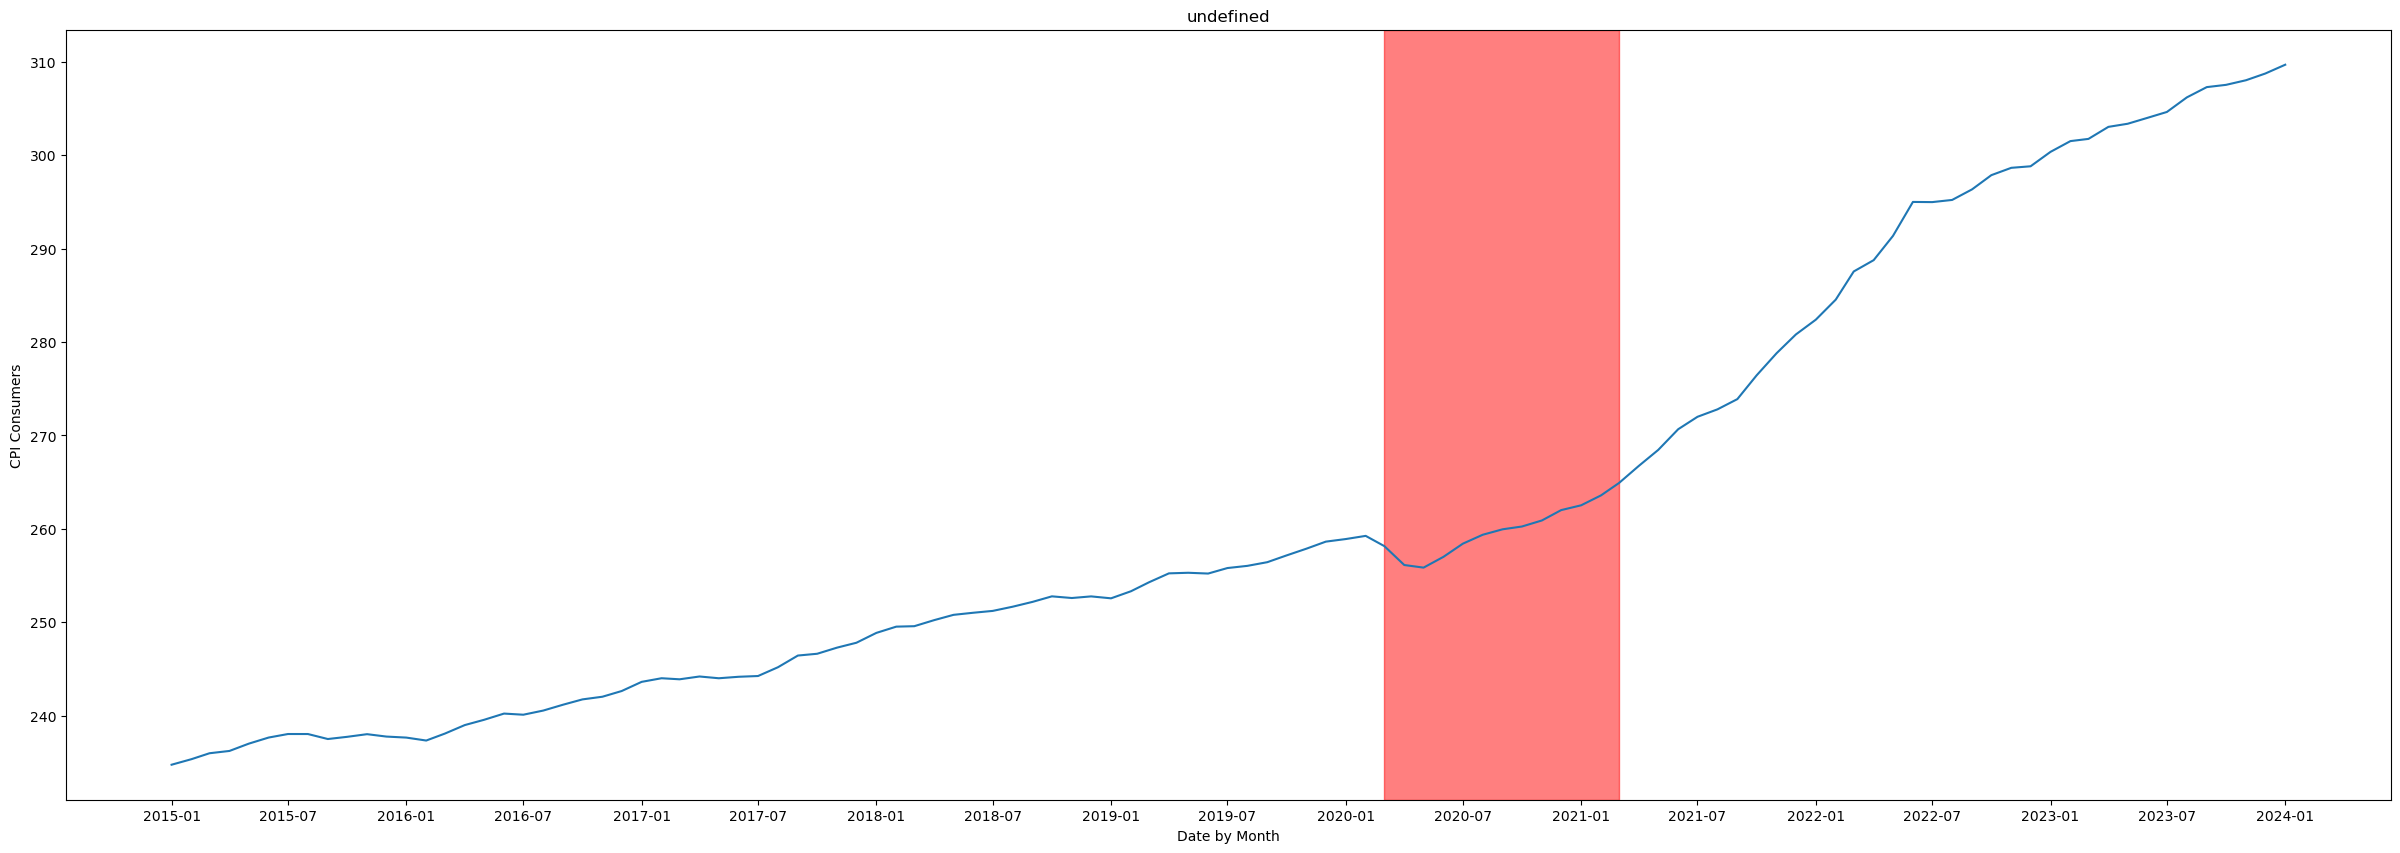

In [6]:
# plotting
fig,ax=plt.subplots(figsize=(30, 10))
ax.plot(cpi_data['Date by Month'], cpi_data['CPI Consumers'])
plt.xlabel('Date by Month')
ax.set_xticks(cpi_data['Date by Month'])
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))
ax.axvspan(*mdates.datestr2num(['2020/03/01', '2021/03/01']), color='red', alpha=0.5)
plt.ylabel('CPI Consumers')
plt.title('undefined')
plt.show()

In [9]:
cpi_data.to_csv('CPI_Data.csv', index=False)